In [2]:
# Import standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import scipy as sp
import scipy.ndimage
%matplotlib inline


# Import personal modules
import sys
sys.path.append('/Users/RanchoP/Dropbox (MIT)/Github/Projects-Parth/Data-Explorer/Library')
import ImageDataFuncs as imf

## Remove Iris

center of mass (292.84469565753852, 120.48052184550581)


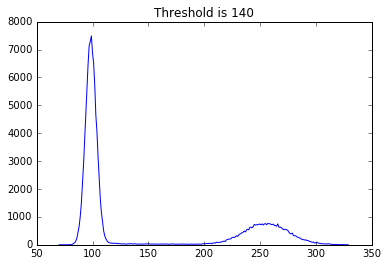

In [3]:
# Sample Image 
imagename = '04-03-2016_17_58_28.fits'
imagedataraw = imf.imagepath2imagedataraw(imf.imagename2imagepath(imagename))

# Center of mass -- in not located at the center
print('center of mass', sp.ndimage.center_of_mass(imagedataraw[1]))

# Histogram
hist_setting = [70,330]
x_hist = np.arange(*hist_setting,1)
y_hist = sp.ndimage.histogram(imagedataraw[1],*hist_setting,x_hist.size)

pp.plot(x_hist,y_hist,'-')
pp.title('Threshold is 140')

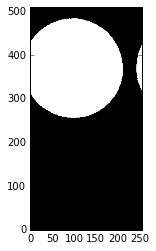

In [4]:
# Mask for the image
threshold = 140
threshold_mask = imagedataraw[1] > 140

# Crop region
ilim = [200,500]
jlim = [0,230]

pp.imshow(threshold_mask,cmap='gray',origin='lower')

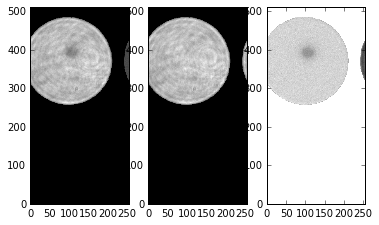

In [7]:
# Making the images
imagedata_wa = (imagedataraw[0]) * threshold_mask
imagedata_woa = (imagedataraw[1]) * threshold_mask
imagedata_abs = (imagedata_wa)/imagedata_woa
imagedata_diff = imagedata_woa - imagedata_wa

pp.subplot(1,3,1)
pp.imshow(imagedata_wa,cmap='gray',origin='lower')
pp.subplot(1,3,2)
pp.imshow(imagedata_woa,cmap='gray',origin='lower')
pp.subplot(1,3,3)
pp.imshow(imagedata_abs,cmap='gray',origin='lower',clim=[0,1.2])



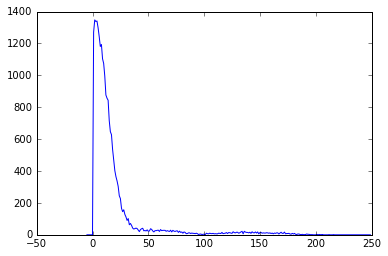

In [8]:
# Histogram of the difference

hist_setting = [-5,250]
x_hist = np.arange(*hist_setting,1)
y_hist = sp.ndimage.histogram(imagedata_diff[imagedata_diff != 0],*hist_setting,x_hist.size)
pp.plot(x_hist,y_hist,'-')
